# Obesidad en USA y a que esta relacionada

esta conformado de varios DataSet tanto de kagle como de paginas guvernamentales.

En este EDA se abarcara:
-  Ambito social (más a la hora de presentar)
-  Ambito economico
-  Ambito de habitos

In [77]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

## Limpieza de data 
- cargar archivos 
- mirar la informacion
- corregir cualquier dato erroneo o faltante

### Obesidad por estados y caracteristicas de cada uno

In [11]:
#1CSV de obesidad por estados area y cantidad de personas.
df_USA=pd.read_csv('Data/National_Obesity_By_State.csv')
df_USA.rename(columns = {'NAME':'State'}, inplace = True)



In [12]:
#2CSV de Obesidad cocn datos extras como poblacion de cada estado
df_GDP_Ob=pd.read_csv('Data/Obesity_GDP_PanelData.csv')
df_GDP_Ob.head()
#usar datos del 2017
df1=df_GDP_Ob[df_GDP_Ob['Year'] == 2017]
df1


,State,Year,Adult.Obesity,Adult.Obesity*100,Average.Age,Average.Income,Population,Poverty.Rate,Poverty.Rate*100,Real.GDP,Real.GDP.Growth,Real.GDP.Growth*100,Real.Personal.Income,Region,Region.Encoding,Unit,Real.GDP.Per.Capita,YearFE
3,Alabama,2017,0.340,34.0,39.176384,26471.72046,4874747,0.168889,16.89,193053.0,0.0181,1.81,215669.8,Southeast Region,5,Millions of chained 2012 dollars,0.039603,2017
7,Alaska,2017,0.287,28.7,35.591403,34438.53759,739795,0.111055,11.11,52492.0,-0.0022,-0.22,38119.9,Far West Region,8,Millions of chained 2012 dollars,0.070955,2017
11,Arizona,2017,0.261,26.1,38.689514,29420.61094,7016270,0.148618,14.86,297209.8,0.0295,2.95,294575.6,Southwest Region,6,Millions of chained 2012 dollars,0.042360,2017
15,Arkansas,2017,0.344,34.4,38.647587,25272.81432,3004279,0.164030,16.40,114851.2,0.0094,0.94,136629.5,Southeast Region,5,Millions of chained 2012 dollars,0.038229,2017
19,California,2017,0.227,22.7,37.651117,35128.22756,39536653,0.133019,13.30,2587571.6,0.0355,3.55,1955659.6,Far West Region,8,Millions of chained 2012 dollars,0.065447,2017
23,Colorado,2017,0.202,20.2,37.788892,36491.06897,5607154,0.102918,10.29,325129.4,0.0308,3.08,285343.0,Rocky Mountain Region,7,Millions of chained 2012 dollars,0.057985,2017
27,Connecticut,2017,0.251,25.1,40.383524,41961.13526,3588184,0.095943,9.59,239884.0,-0.0065,-0.65,226462.2,New England Region,1,Millions of chained 2012 dollars,0.066854,2017
31,Delaware,2017,0.294,29.4,40.292749,34849.82608,961939,0.135822,13.58,63651.0,-0.0011,-0.11,45604.3,Mideast Region,2,Millions of chained 2012 dollars,0.066169,2017
35,Florida,2017,0.257,25.7,41.521161,29834.12689,20984400,0.140472,14.05,885905.7,0.0253,2.53,952254.7,Southeast Region,5,Millions of chained 2012 dollars,0.042217,2017
39,Georgia,2017,0.296,29.6,37.253689,29607.16698,10429379,0.149457,14.95,509422.2,0.0287,2.87,475057.9,Southeast Region,5,Millions of chained 2012 dollars,0.048845,2017


In [13]:
#combinacion de CSV 1 y CSV 2 ordenado por stados con mayor obesidad
df_Usa_GDP_Ob=pd.merge(df_USA, df1)
clean_Usa_GDP_OB=df_Usa_GDP_Ob.drop(['Obesity','FID','Adult.Obesity','Poverty.Rate','Real.GDP.Growth','YearFE','SHAPE_Length','Region.Encoding','Population','Region','Real.GDP.Growth*100'], axis=1)
clean_Usa_GDP_OB.columns

Index(['State', 'SHAPE_Area', 'Year', 'Adult.Obesity*100', 'Average.Age',
       'Average.Income', 'Poverty.Rate*100', 'Real.GDP',
       'Real.Personal.Income', 'Unit', 'Real.GDP.Per.Capita'],
      dtype='object')

In [14]:
# 3 CSV restaurantes por cada 100k personas
Res_estado=pd.read_csv('Data/Cantidad_Res.csv')
Res_estado.rename(columns = {'All Fast Food RES':'All-Fast-Food-RES per-100k'}, inplace = True)
Res_estado.replace({'State': {'Idaho\t': 'Idaho', 'Maine\t': 'Maine'}},inplace=True)

In [15]:
# 4 CSV Poblacion por estados
Pob_estado=pd.read_csv('Data/NST-EST2022-ALLDATA.csv')
Pob_estado.drop(['SUMLEV', 'REGION', 'DIVISION', 'STATE','POPESTIMATE2021','POPESTIMATE2020', 'POPESTIMATE2022', 'NPOPCHG_2020',
       'NPOPCHG_2021', 'NPOPCHG_2022', 'BIRTHS2020', 'BIRTHS2021',
       'BIRTHS2022', 'DEATHS2020', 'DEATHS2021', 'DEATHS2022',
       'NATURALCHG2020', 'NATURALCHG2021', 'NATURALCHG2022',
       'INTERNATIONALMIG2020', 'INTERNATIONALMIG2021', 'INTERNATIONALMIG2022',
       'DOMESTICMIG2020', 'DOMESTICMIG2021', 'DOMESTICMIG2022', 'NETMIG2020',
       'NETMIG2021', 'NETMIG2022', 'RESIDUAL2020', 'RESIDUAL2021',
       'RESIDUAL2022', 'RBIRTH2021', 'RBIRTH2022', 'RDEATH2021', 'RDEATH2022',
       'RNATURALCHG2021', 'RNATURALCHG2022', 'RINTERNATIONALMIG2021',
       'RINTERNATIONALMIG2022', 'RDOMESTICMIG2021', 'RDOMESTICMIG2022',
       'RNETMIG2021', 'RNETMIG2022'], axis=1,inplace=True)
Pob_estado.rename(columns = {'NAME':'State'}, inplace = True)
Pob_estado.rename(columns = {'ESTIMATESBASE2020':'Population'}, inplace = True)


In [16]:
# Union de CSV 3 y CSV 4
pob_res_estado=pd.merge(Pob_estado, Res_estado)


In [17]:
#adicion de columna
pob_res_estado['All fast food']=round(pob_res_estado['Population']*pob_res_estado['All-Fast-Food-RES per-100k']/100000) 


In [74]:
#Data limpia y completa
Data_1=pd.merge(clean_Usa_GDP_OB, pob_res_estado)
Data_1.sort_values(['Adult.Obesity*100'],ascending=False)
Data_1

,State,SHAPE_Area,Year,Adult.Obesity*100,Average.Age,Average.Income,Poverty.Rate*100,Real.GDP,Real.Personal.Income,Unit,Real.GDP.Per.Capita,Population,All-Fast-Food-RES per-100k,Full-service Res,All fast food
0,Texas,7.672329e+12,2017,28.0,35.842658,29546.10192,14.73,1624948.8,1325668.8,Millions of chained 2012 dollars,0.057409,29145428,75.8,63.8,22092.0
1,California,5.327809e+12,2017,22.7,37.651117,35128.22756,13.30,2587571.6,1955659.6,Millions of chained 2012 dollars,0.065447,39538245,82.3,80.4,32540.0
2,Kentucky,1.128830e+12,2017,32.9,38.866208,26627.37441,17.24,183566.0,196801.6,Millions of chained 2012 dollars,0.041212,4505893,74.2,63.2,3343.0
3,Georgia,1.652980e+12,2017,29.6,37.253689,29607.16698,14.95,509422.2,475057.9,Millions of chained 2012 dollars,0.048845,10711937,82.5,69.4,8837.0
4,Wisconsin,1.567816e+12,2017,30.4,39.592134,32003.04263,11.33,292477.2,292707.6,Millions of chained 2012 dollars,0.050466,5893725,65.0,86.4,3831.0
5,Oregon,3.178446e+12,2017,26.4,39.701947,31918.45573,13.24,206710.9,191045.1,Millions of chained 2012 dollars,0.049897,4237291,73.4,104.1,3110.0
6,Virginia,1.158804e+12,2017,27.2,38.606433,37485.33127,10.64,463426.1,434480.0,Millions of chained 2012 dollars,0.054714,8631384,80.1,81.7,6914.0
7,Tennessee,1.177054e+12,2017,31.8,38.915088,28655.88187,14.95,313572.6,315891.1,Millions of chained 2012 dollars,0.046690,6910786,77.8,68.2,5377.0
8,Louisiana,1.355094e+12,2017,34.5,37.885754,26010.45294,19.75,228678.1,215828.2,Millions of chained 2012 dollars,0.048818,4657749,76.2,65.0,3549.0
9,New York,1.411441e+12,2017,24.6,39.347850,37157.92734,14.08,1407216.7,1052014.9,Millions of chained 2012 dollars,0.070895,20201230,92.3,106.1,18646.0


### Obesidad relacionada con ganancias brutas y edad

In [34]:
# 5 CSV de obesidad con diversos dadtos de adultos USA

df_adults_Ob=pd.read_csv('Data/percent_of_adults_with_obesity_usafacts.csv')
df_adults_Ob.drop_duplicates('Years', keep="last",inplace=True)
df_adults_Ob

#Hay datos tanto de obesidad por edad, por etnicidad, por ganancia bruta anual y por sexo.
#usar datos 2017
#revisar estados con obesidad

,Years,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Percent of adults with obesity (%),0.158,0.168,0.166,0.183,0.198,0.201,0.211,0.222,0.228,...,0.278000,0.276000,0.294000,0.296000,0.298000,0.299000,0.313000,0.309000,0.32100,0.319000
1,By age group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18 - 24 (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.156449,0.158255,0.159340,0.163078,0.173857,0.174882,0.174706,0.184941,0.19874,0.195196
3,25 - 34 (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.261784,0.261725,0.271686,0.279784,0.272667,0.276667,0.292980,0.301373,0.30440,0.311608
4,35 - 44 (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.307529,0.315275,0.323471,0.331255,0.329098,0.337843,0.338020,0.350863,0.35350,0.360588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Wisconsin (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.277000,0.297000,0.298000,0.312000,0.307000,0.307000,0.320000,0.320000,0.34200,0.323000
185,Wyoming (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.250000,0.246000,0.278000,0.295000,0.290000,0.277000,0.288000,0.290000,0.29700,0.307000
186,Sources:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,Centers for Disease Control and Prevention,Behavioral Risk Factor Surveillance System,NaN,https://www.cdc.gov/brfss/brfssprevalence/,NaN,2020,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# porcentaje de obesidad segun ganancia anual 2017
Df1_adult_ob=df_adults_Ob.set_index('Years')
obesidad_ganancia_anual=Df1_adult_ob.iloc[17:22,16:]
obesidad_ganancia_anual=obesidad_ganancia_anual.reset_index()
obesidad_ganancia_anual

,Years,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"Less than $15,000 (%)",0.323569,0.327235,0.331451,0.349373,0.350843,0.347961,0.365078,0.362588,0.37206,0.368000
1,"$15,000 - $24,999 (%)",0.309667,0.311216,0.322843,0.324961,0.332804,0.334627,0.344451,0.352412,0.35950,0.356647
2,"$25,000 - $34,999 (%)",0.295275,0.290922,0.301686,0.307529,0.320667,0.321784,0.328980,0.332588,0.34252,0.349294
3,"$35,000 - $49,999 (%)",0.289373,0.291294,0.299765,0.311922,0.309157,0.319706,0.328294,0.328314,0.33872,0.347020
4,"$50,000 and above (%)",0.255078,0.261039,0.265667,0.272137,0.273569,0.279451,0.286137,0.300353,0.30698,0.310176


In [36]:
#porcentaje de obesidad segun la edad en 2017
obesidad_edad=Df1_adult_ob.iloc[3:8,16:]
obesidad_edad=obesidad_edad.reset_index()
obesidad_edad
#explicar que se mantienen las 

,Years,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,25 - 34 (%),0.261784,0.261725,0.271686,0.279784,0.272667,0.276667,0.292980,0.301373,0.30440,0.311608
1,35 - 44 (%),0.307529,0.315275,0.323471,0.331255,0.329098,0.337843,0.338020,0.350863,0.35350,0.360588
2,45 - 54 (%),0.325471,0.325824,0.338137,0.340157,0.344314,0.354098,0.365098,0.377686,0.38096,0.384961
3,55 - 64 (%),0.329098,0.331020,0.333941,0.339745,0.337471,0.341412,0.352706,0.354294,0.36706,0.362255
4,65 or older (%),0.250922,0.258373,0.266451,0.274216,0.279627,0.281510,0.288902,0.289235,0.29934,0.294961


### Valores Nutricionales del menu de comidas rapidas

In [199]:
#6 CSV datos nutritivos de ['Pizza Hut', 'Burger King', 'Starbucks', 'McDonalds', 'KFC','Dominos']
df_nutri=pd.read_csv('Data/Nutrition_Value_Dataset_1.csv')
df_nutri.rename(columns={'Trans Fat (g)':'Trans Fat (mg)'},inplace=True)
df_nutri.loc[256,'Trans Fat (mg)']=df_nutri.loc[256,'Trans Fat (mg)']/10
df_nutri['Trans Fat (mg)']=df_nutri['Trans Fat (mg)']*1000
df_nutri.sort_values('Trans Fat (mg)',ascending=False)

,Company,Category,Product,Per Serve Size,Energy (kCal),Carbohydrates (g),Protein (g),Fiber (g),Sugar (g),Total Fat (g),Saturated Fat (g),Trans Fat (mg),Cholesterol (mg),Sodium (mg)
256,McDonalds,REGULAR MENU,5 piece Chicken Strips,145.0,411.09,0.73,25.43,3.00,0.72,28.54,0.15,7526.0,6.70,1193.05
201,Starbucks,"Cookies, Brownies & Bars",Oat Bar,80.0,360.00,43.00,6.00,5.00,12.00,19.00,11.00,1000.0,40.00,220.00
523,Dominos,All Meals,ZINGY PARCEL VEG,180.0,620.40,69.50,16.90,18.12,8.80,30.50,15.10,600.0,2119.75,NaN
527,Dominos,All Meals,ZINGY PARCEL CHICKEN,210.0,667.50,17.30,19.20,16.92,10.60,31.30,14.10,560.0,541.49,NaN
487,Dominos,All Meals,CHICKEN SALAMI SPECIAL LARGE,97.0,283.70,29.40,11.40,14.88,3.90,13.40,12.40,500.0,393.96,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Burger King,All Meals,Masala Whopper Veg,310,753.20,94.70,19.00,8.00,11.80,33.20,13.50,0.0,630.80,1.70
150,Burger King,All Meals,Veg Whopper,296,749.00,100.60,11.00,12.00,8.30,31.40,16.00,0.0,345.40,1.60
148,Burger King,All Meals,Veg Supreme,147,374.10,49.20,11.50,7.00,6.60,16.50,5.00,0.0,189.75,0.60
147,Burger King,All Meals,Paneer king,165,525.80,67.10,14.00,10.00,6.90,22.40,10.40,0.0,313.60,1.40


In [203]:
df_nutri['Category'].unique()

array(['All Meals', 'Hot Breakfast', 'Cookies, Brownies & Bars',
       'Croissants, Danishes & Bagels',
       'Loaves, Coffee Cakes & Cake Pops', 'Seasonal Bakery Offerings',
       'Fruit & Yogurt', 'REGULAR MENU', 'BREAKFAST MENU', 'McCAFE MENU',
       'DESSERTS MENU', 'GOURMET MENU', 'CONDIMENTS MENU'], dtype=object)

In [8]:
pd.set_option('display.max_rows', None)

## Analisis y visualizacion

In [88]:
import folium # pip install folium
from folium import plugins
import geocoder # pip install geocoder
import geopy # pip install geopy
import numpy as np
import pandas as pd
from vega_datasets import data as vds # pip install vega_datasets

In [89]:

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Visualizacion obesidad por estados y restaurantes

In [210]:
Data_state_1=Data_1.set_index('State')


In [221]:
# plt.figure(figsize=(15,15))
# sns.heatmap(Data_state_1.corr(),
#             vmin=-1,
#             vmax=1,
#             cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
#             square=True,
#             linewidths=.1,
#             annot=True);

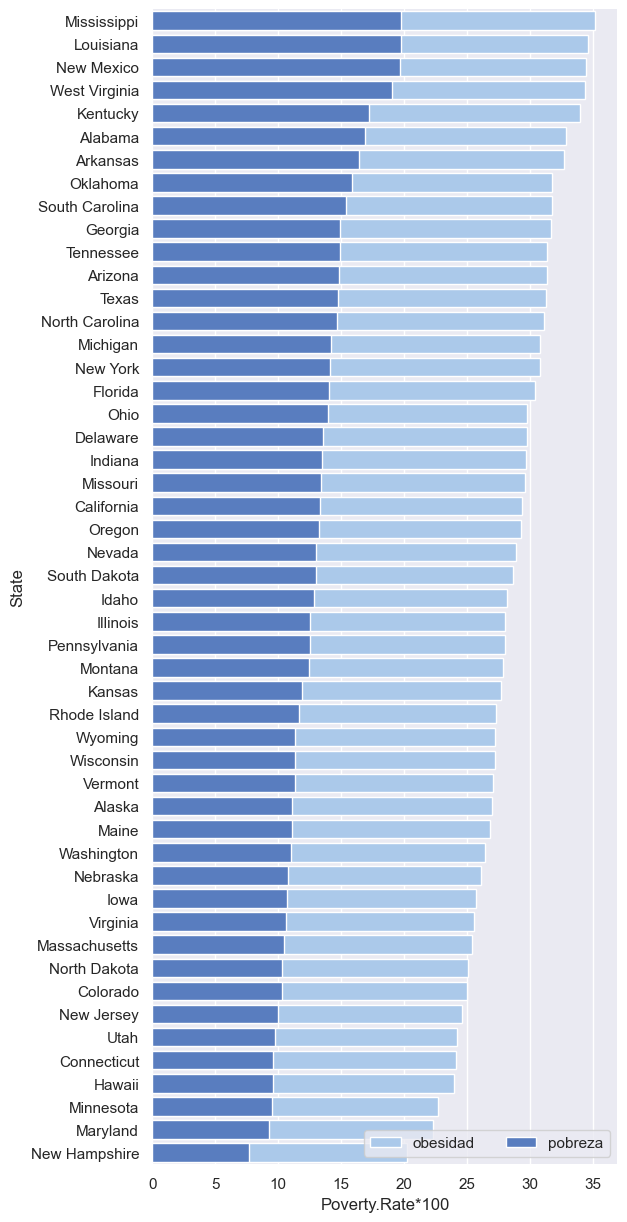

In [209]:
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Adult.Obesity*100", y="State", data=Data_1.sort_values(['Adult.Obesity*100'],ascending=False),
            label="obesidad", color="b")
# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x='Poverty.Rate*100', y="State", data=Data_1.sort_values(['Poverty.Rate*100'],ascending=False),
            label="pobreza", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)


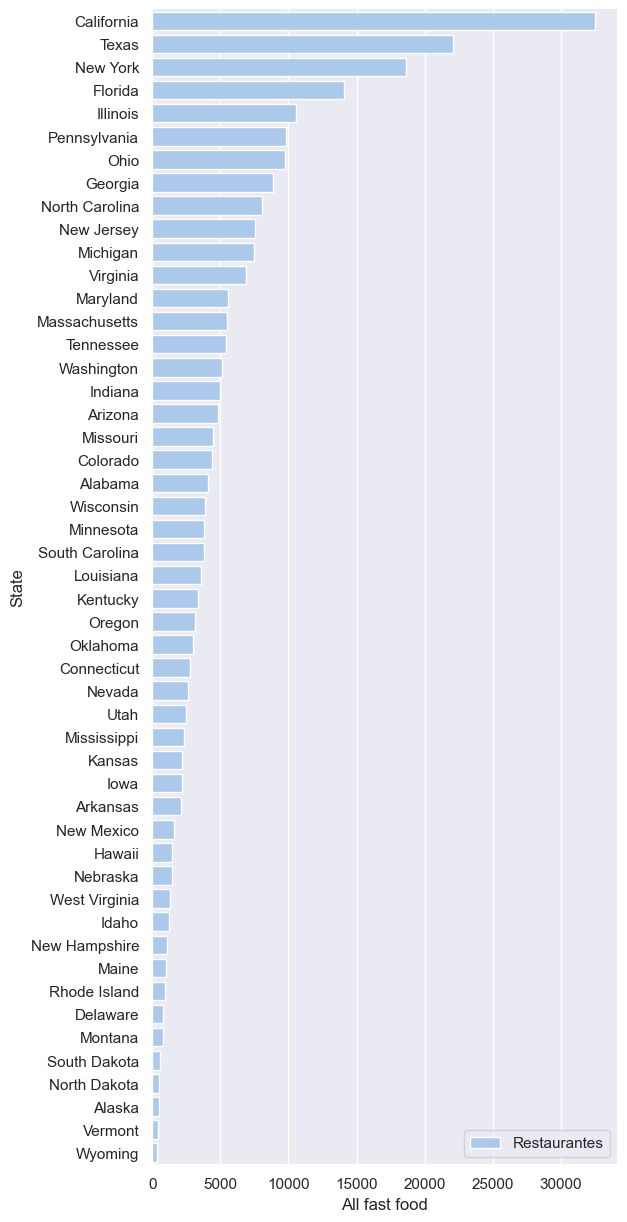

In [222]:
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x='All fast food', y="State", data=Data_1.sort_values(['All fast food'],ascending=False),
            label="Restaurantes", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

In [76]:
Data_1.loc[:,['State','Adult.Obesity*100']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              50 non-null     object 
 1   Adult.Obesity*100  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [227]:
State_obe=Data_1
 
# Initialize the map:
m = folium.Map(location=[38.788, -101], zoom_start = 3, scrollWheelZoom=False,tiles='CartoDB positron')

# add tile layers to the map
# con esto posibilito que luego en el mapa pueda elegir el 'tipo de vista'
tiles = ['stamenwatercolor','cartodbpositron','openstreetmap','stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(m)
    
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data='Data/us-state-boundaries.json',
 name='choropleth',
 data=State_obe,
 columns=['State', 'All fast food'],
 fill_color='BuPu',
 key_on='feature.properties.name' ,
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Indice de obesidad (%)'
)
folium.LayerControl().add_to(m)

m

TypeError: list indices must be integers or slices, not str

In [70]:
State_obeso=Data_1
 
# Initialize the map:
n = folium.Map(location=[38.788, -101], zoom_start = 3, scrollWheelZoom=False,tiles='CartoDB positron')

# add tile layers to the map
# con esto posibilito que luego en el mapa pueda elegir el 'tipo de vista'
tiles = ['stamenwatercolor','cartodbpositron','openstreetmap','stamenterrain']
for tile in tiles:
    folium.TileLayer(tile).add_to(n)
    
 
# Add the color for the chloropleth:
n.choropleth(
 geo_data='Data/us-state-boundaries.json',
 name='choropleth',
 data=State_obeso,
 columns=['State', 'Adult.Obesity*100'],
 fill_color='BuPu',
 key_on='feature.properties.name' ,
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Indice de obesidad (%)'
)
folium.LayerControl().add_to(m)

n

SSLError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /python-visualization/folium/master/examples/data/us-states.json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1076)')))

In [20]:
Data_1.columns

Index(['State', 'SHAPE_Area', 'Year', 'Adult.Obesity*100', 'Average.Age',
       'Average.Income', 'Poverty.Rate*100', 'Real.GDP',
       'Real.Personal.Income', 'Unit', 'Real.GDP.Per.Capita', 'Population',
       'All-Fast-Food-RES per-100k', 'Full-service Res', 'All fast food'],
      dtype='object')

### Visualizacion de obesidad por edades y ganancia en USA

In [213]:
Obesidad_edad=obesidad_edad.set_index('Years')

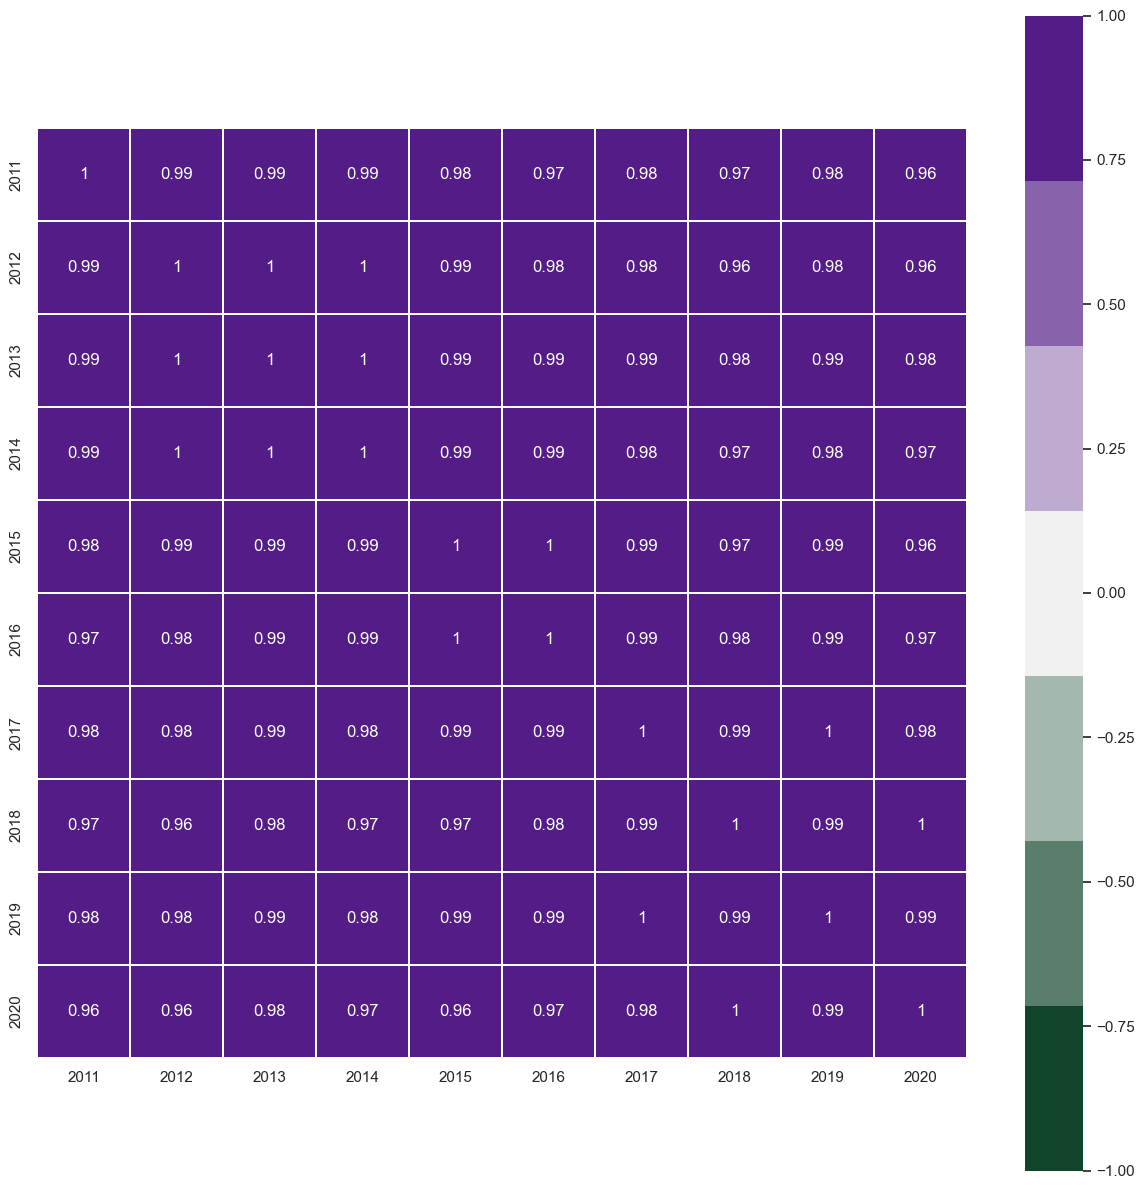

In [215]:
plt.figure(figsize=(15,15))
sns.heatmap(Obesidad_edad.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

Text(0.5, 0, 'Ratio Obesidad')

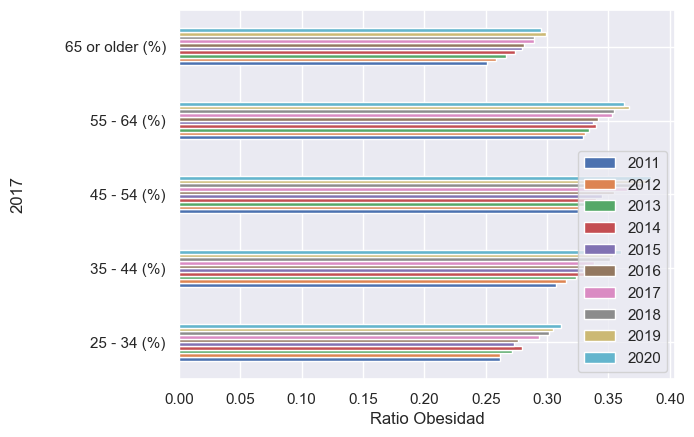

In [214]:
Obesidad_edad.plot(kind='barh')
plt.ylabel("2017")
plt.xlabel("Ratio Obesidad")

In [52]:
Obesidad_G_anual=obesidad_ganancia_anual.set_index('Years')


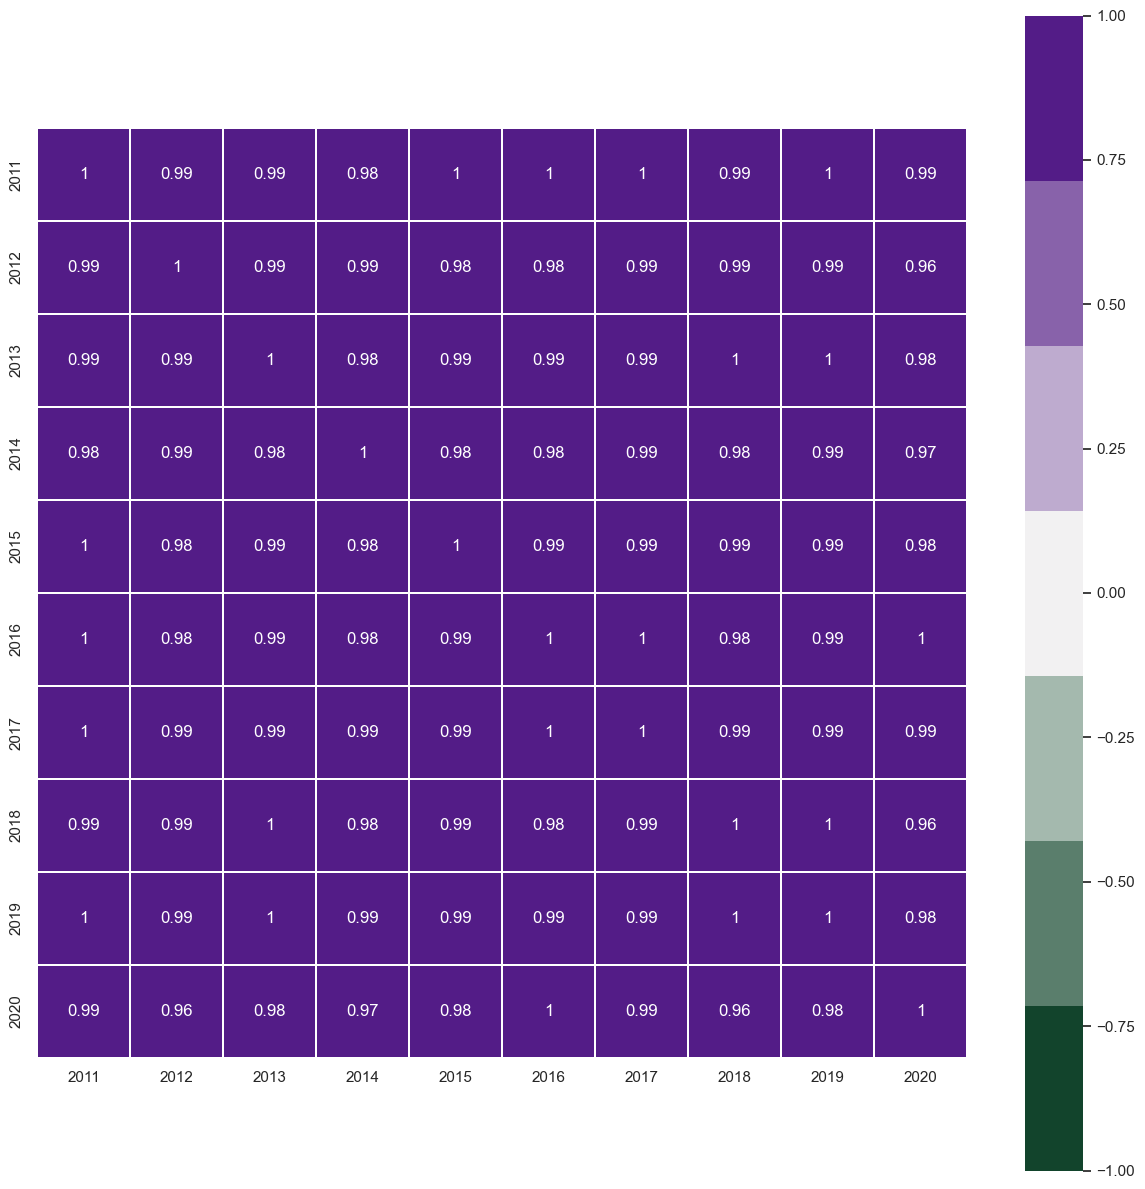

In [212]:
plt.figure(figsize=(15,15))
sns.heatmap(Obesidad_G_anual.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

Text(0.5, 0, 'Ratio Obesidad')

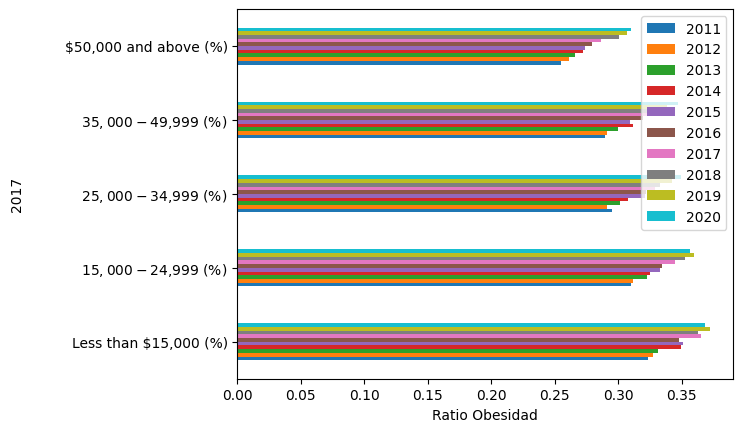

In [53]:
Obesidad_G_anual.plot(kind='barh')

plt.ylabel("2017")
plt.xlabel("Ratio Obesidad")

### Visualizacion de datos nutritivos

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [201]:
df_nutri_1=df_nutri.loc[:,'Carbohydrates (g)':'Saturated Fat (g)']
df_nutri_2=df_nutri.loc[:,'Trans Fat (mg)':'Sodium (mg)']


<AxesSubplot:>

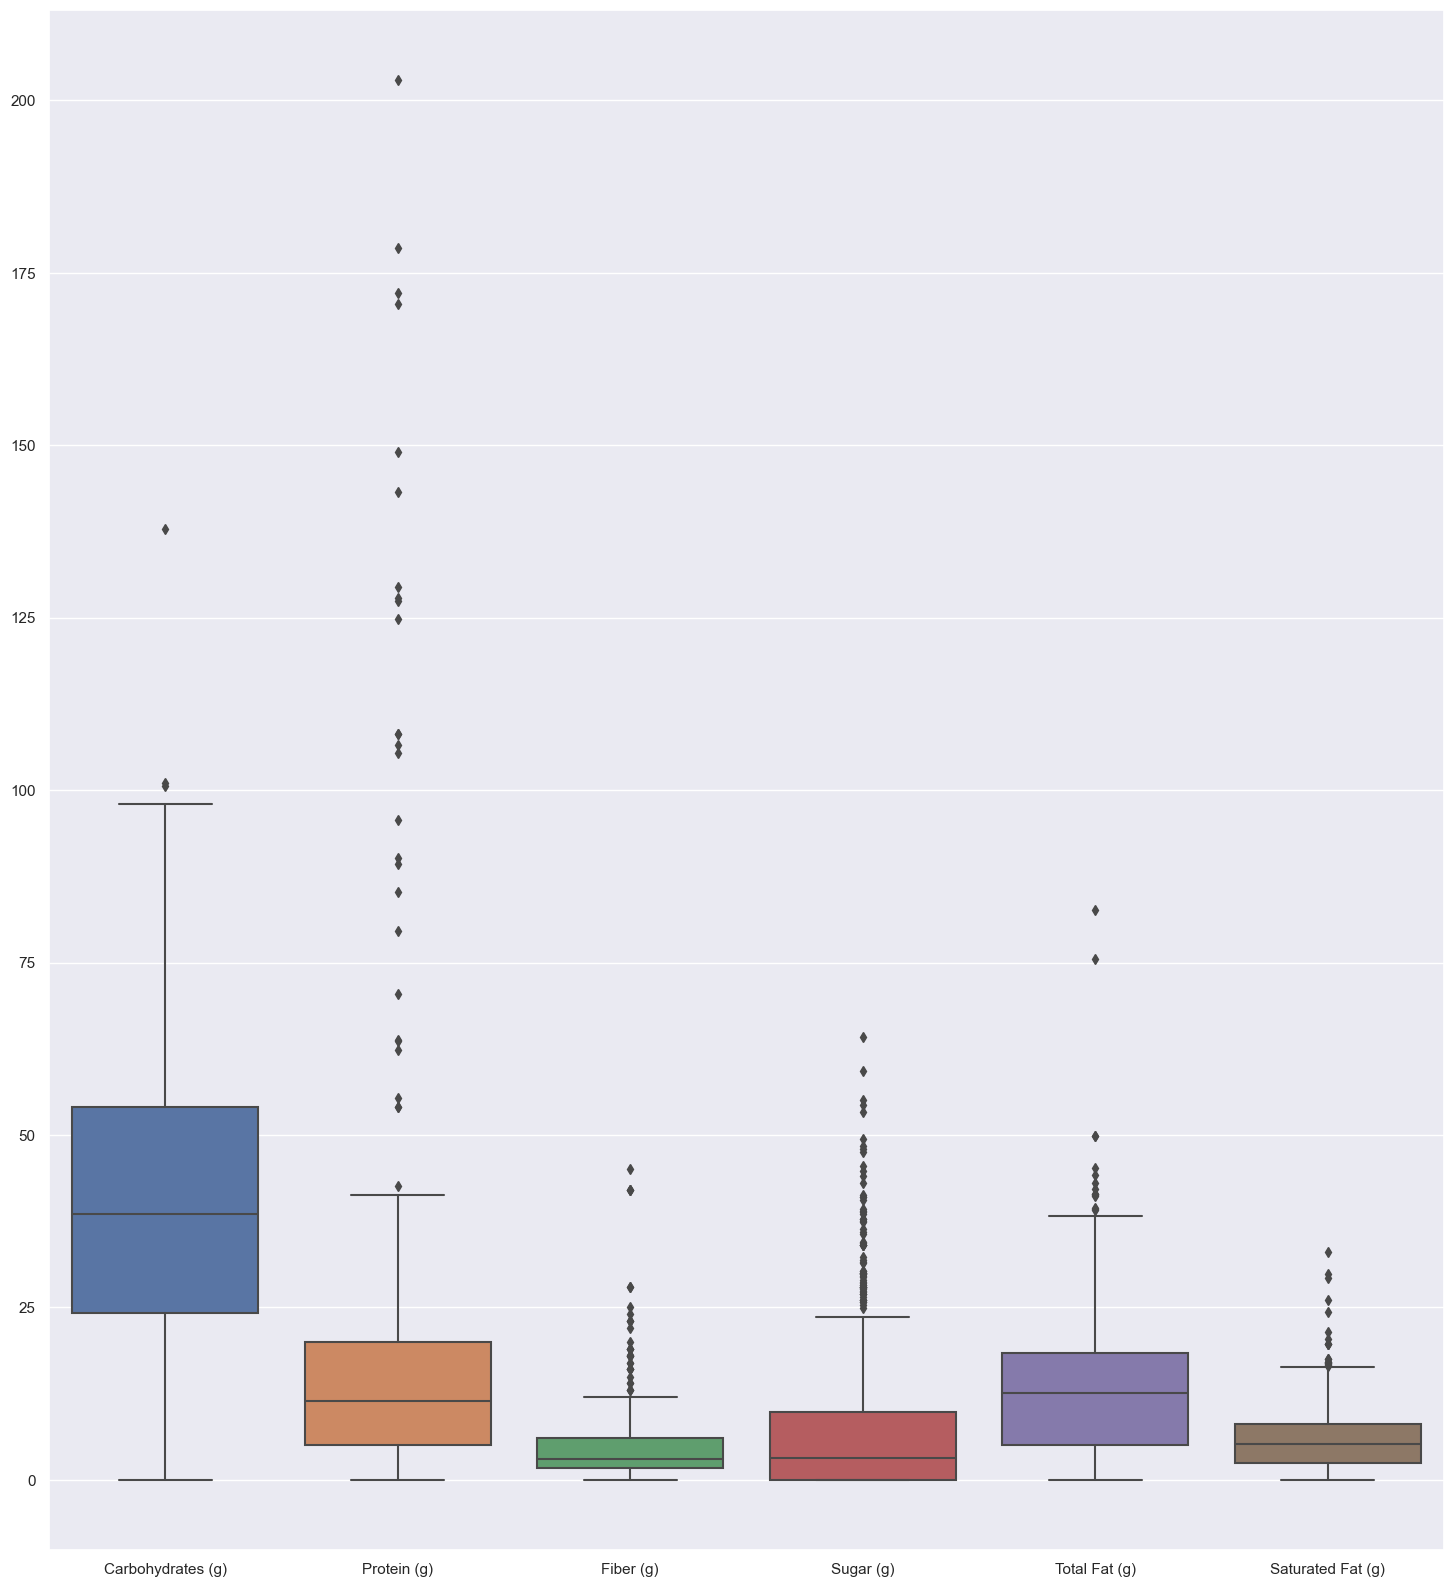

In [176]:
plt.figure(figsize=(18,20))
sns.boxplot(data=df_nutri_1)

<AxesSubplot:>

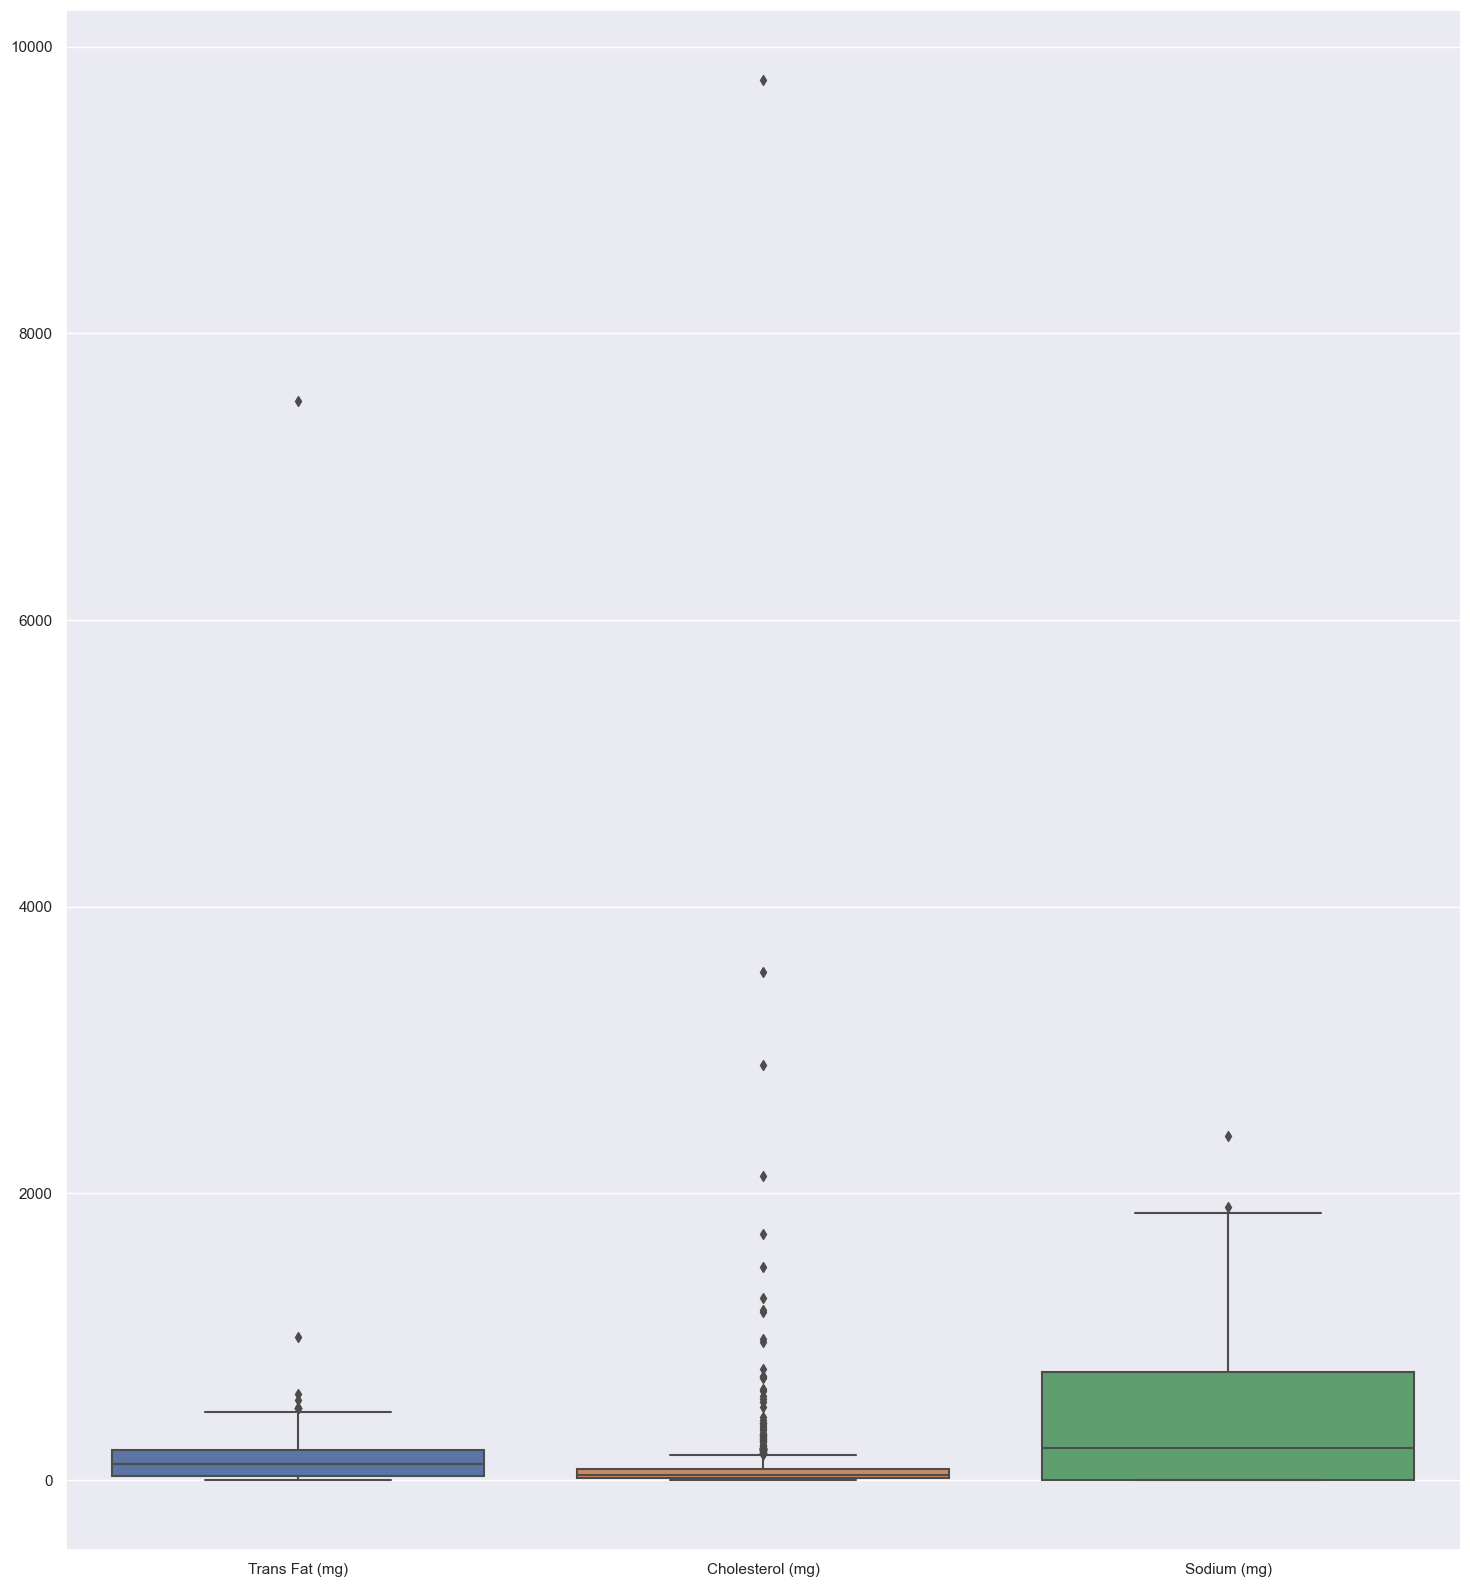

In [202]:
plt.figure(figsize=(18,20))
sns.boxplot(data=df_nutri_2)

In [219]:
df_nutri['Company'].unique()

array(['Pizza Hut', 'Burger King', 'Starbucks', 'McDonalds', 'KFC',
       'Dominos'], dtype=object)

In [220]:
nutri_starbucks=[df_nutri['Company']=='Starbucks']
nutri_McDonalds=[df_nutri['Company']=='McDonalds']
nutri_KFC=[df_nutri['Company']=='KFC']
nutri_Dominoss=[df_nutri['Company']=='Dominos']
nutri_Burger_Kings=[df_nutri['Company']=='Burger King']
nutri_Pizza_Hut=[df_nutri['Company']=='Pizza Hut']

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Energy (kCal)'),
  Text(2, 0, 'Carbohydrates (g)'),
  Text(3, 0, 'Protein (g)'),
  Text(4, 0, 'Fiber (g)'),
  Text(5, 0, 'Sugar (g)'),
  Text(6, 0, 'Total Fat (g)'),
  Text(7, 0, 'Saturated Fat (g)'),
  Text(8, 0, 'Trans Fat (g)'),
  Text(9, 0, 'Cholesterol (mg)'),
  Text(10, 0, 'Sodium (mg)')])

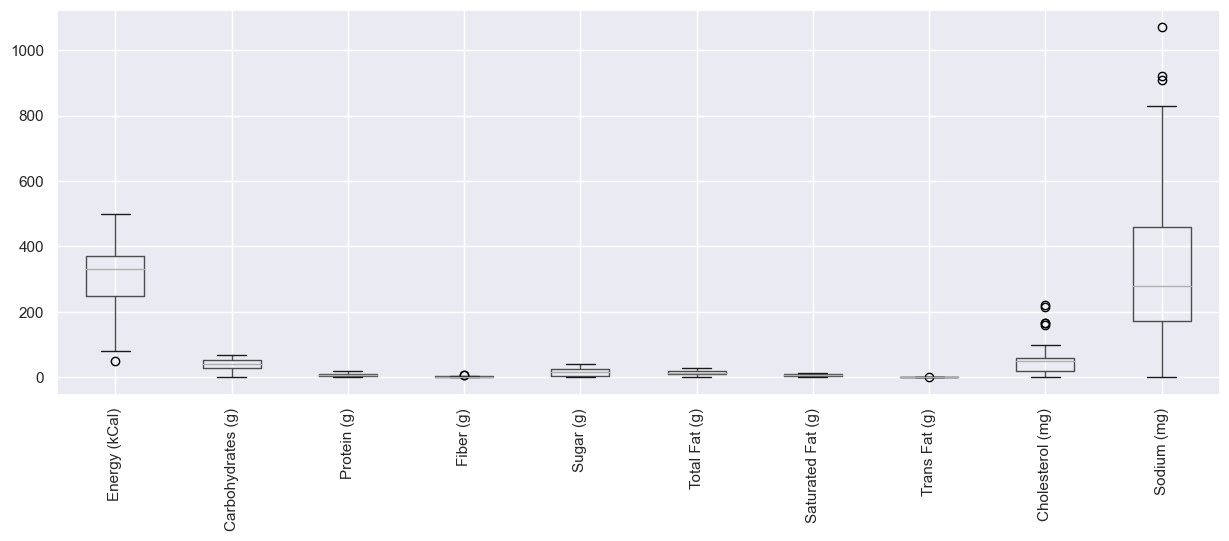

In [114]:
nutri_starbucks.boxplot(figsize=(15,5));
plt.xticks(rotation=90);

## Preguntas y Respuestas

### Hipotessis 1:
-la obesidad va relacionada con la cantidad de restaurantes que hay en la zona:

no hay relacion directa entre los retaurantes de la zona y la obesidad
### Hipotesis 2: 
-la obesidad va en relacion a la cantidad de dinero agnada:

hay una relacion directa con el indice de obesidad y la cantidad de 
### Hipotesis 2.1:
-debido a los bajos precios de la comida rapida y su bajo valor nutricional se genera la obesidad